# Data Preprocessing

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Set the seaborn style
style.use('seaborn')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [32]:
print('Survived :',df.Survived.unique())
print('Pclass   :',df.Pclass.unique())
print('Sex      :',df.Sex.unique())
print('Embarked :',df.Embarked.unique())

Survived : [0 1]
Pclass   : [3 1 2]
Sex      : ['male' 'female']
Embarked : ['S' 'C' 'Q' nan]


In [33]:
df.duplicated().sum()

0

In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
df.drop('Cabin',axis=1,inplace=True)
df.Age.replace(np.nan,df.Age.mean(),inplace=True)
df.Embarked.replace(np.nan,df.Embarked.mode()[0], inplace=True)

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [36]:
# Creating a new column family_members by adding SibSp and Parch
df['family_member'] = df.SibSp + df.Parch
df.drop(['SibSp','Parch'],axis = 1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_member
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0


# --------------------------------------------------------------------

# Exploratory Data Analysis

<Axes: xlabel='Age', ylabel='Density'>

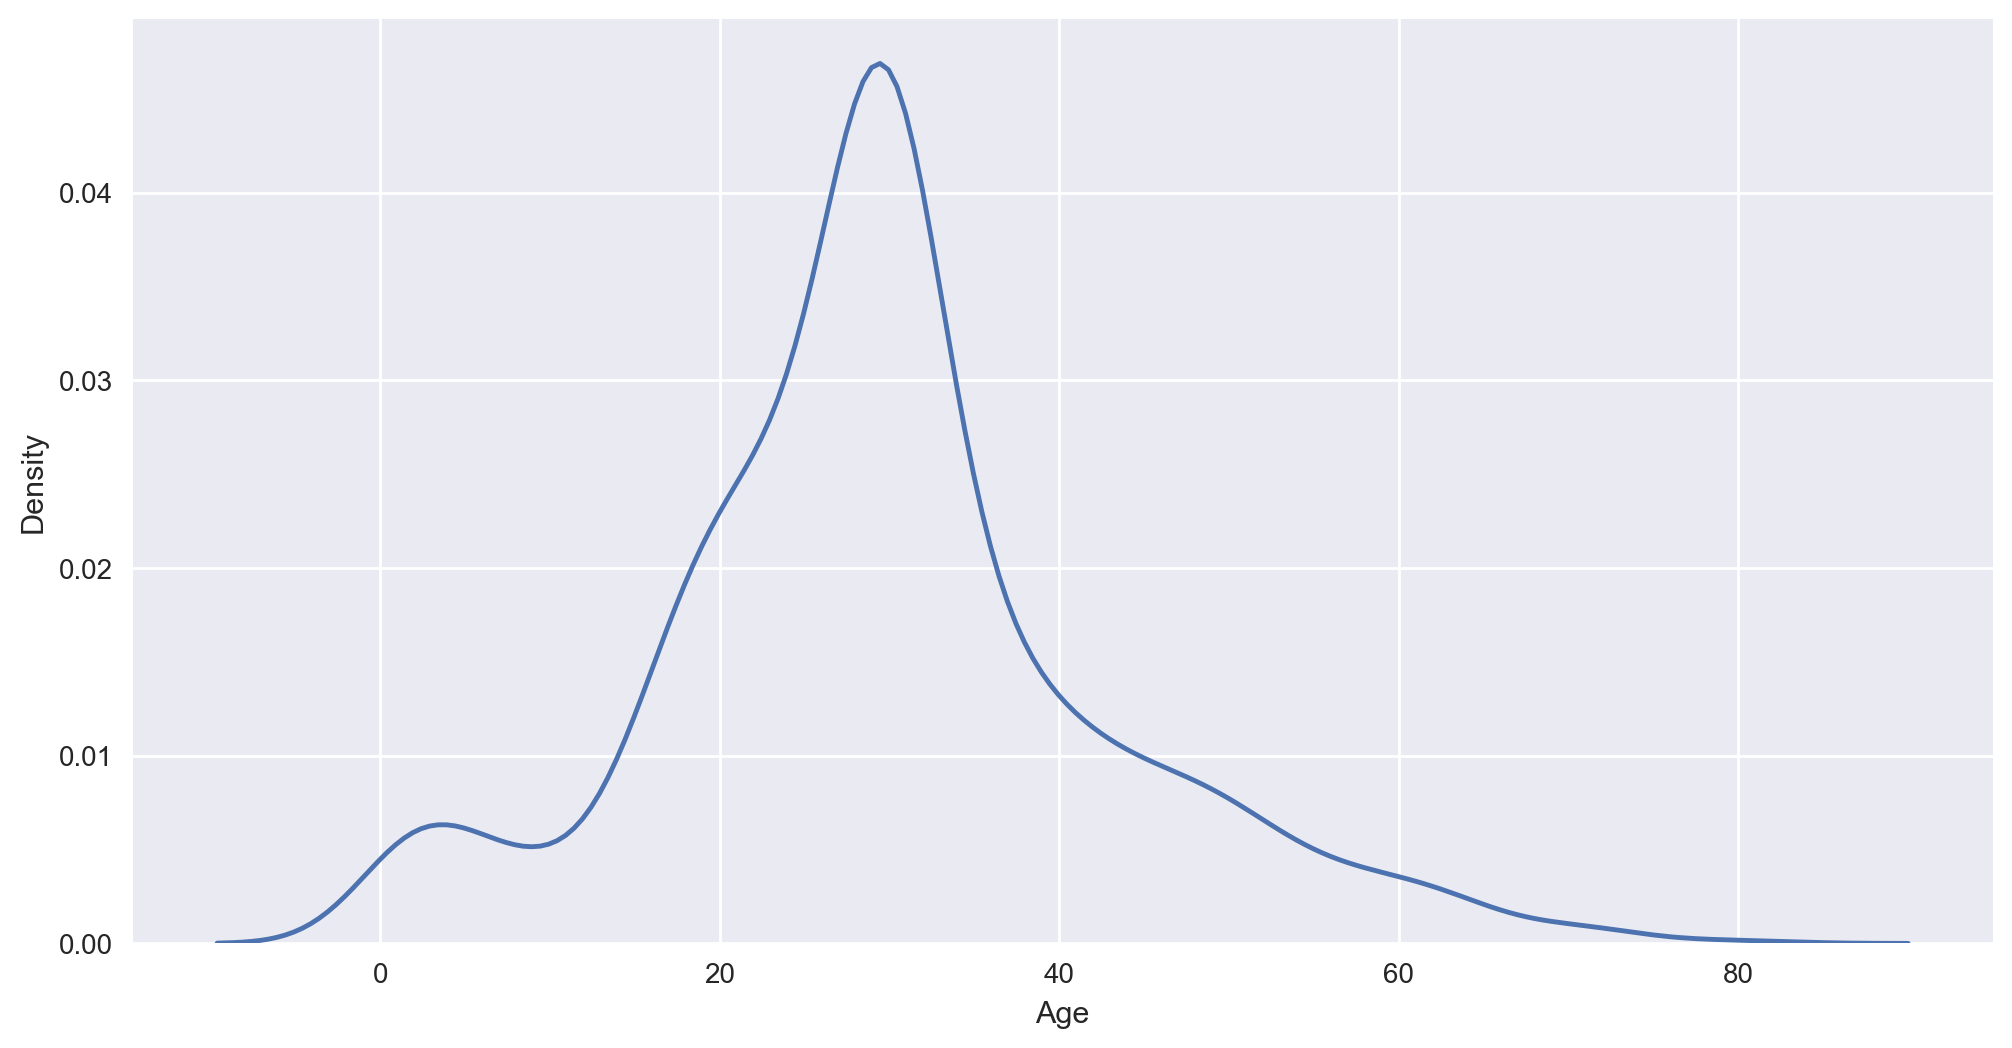

In [37]:
#Checking distribution of Age
plt.figure(figsize=(12,6),dpi=200)
sns.distplot(df.Age,hist=False)

<Axes: xlabel='Survived', ylabel='Age'>

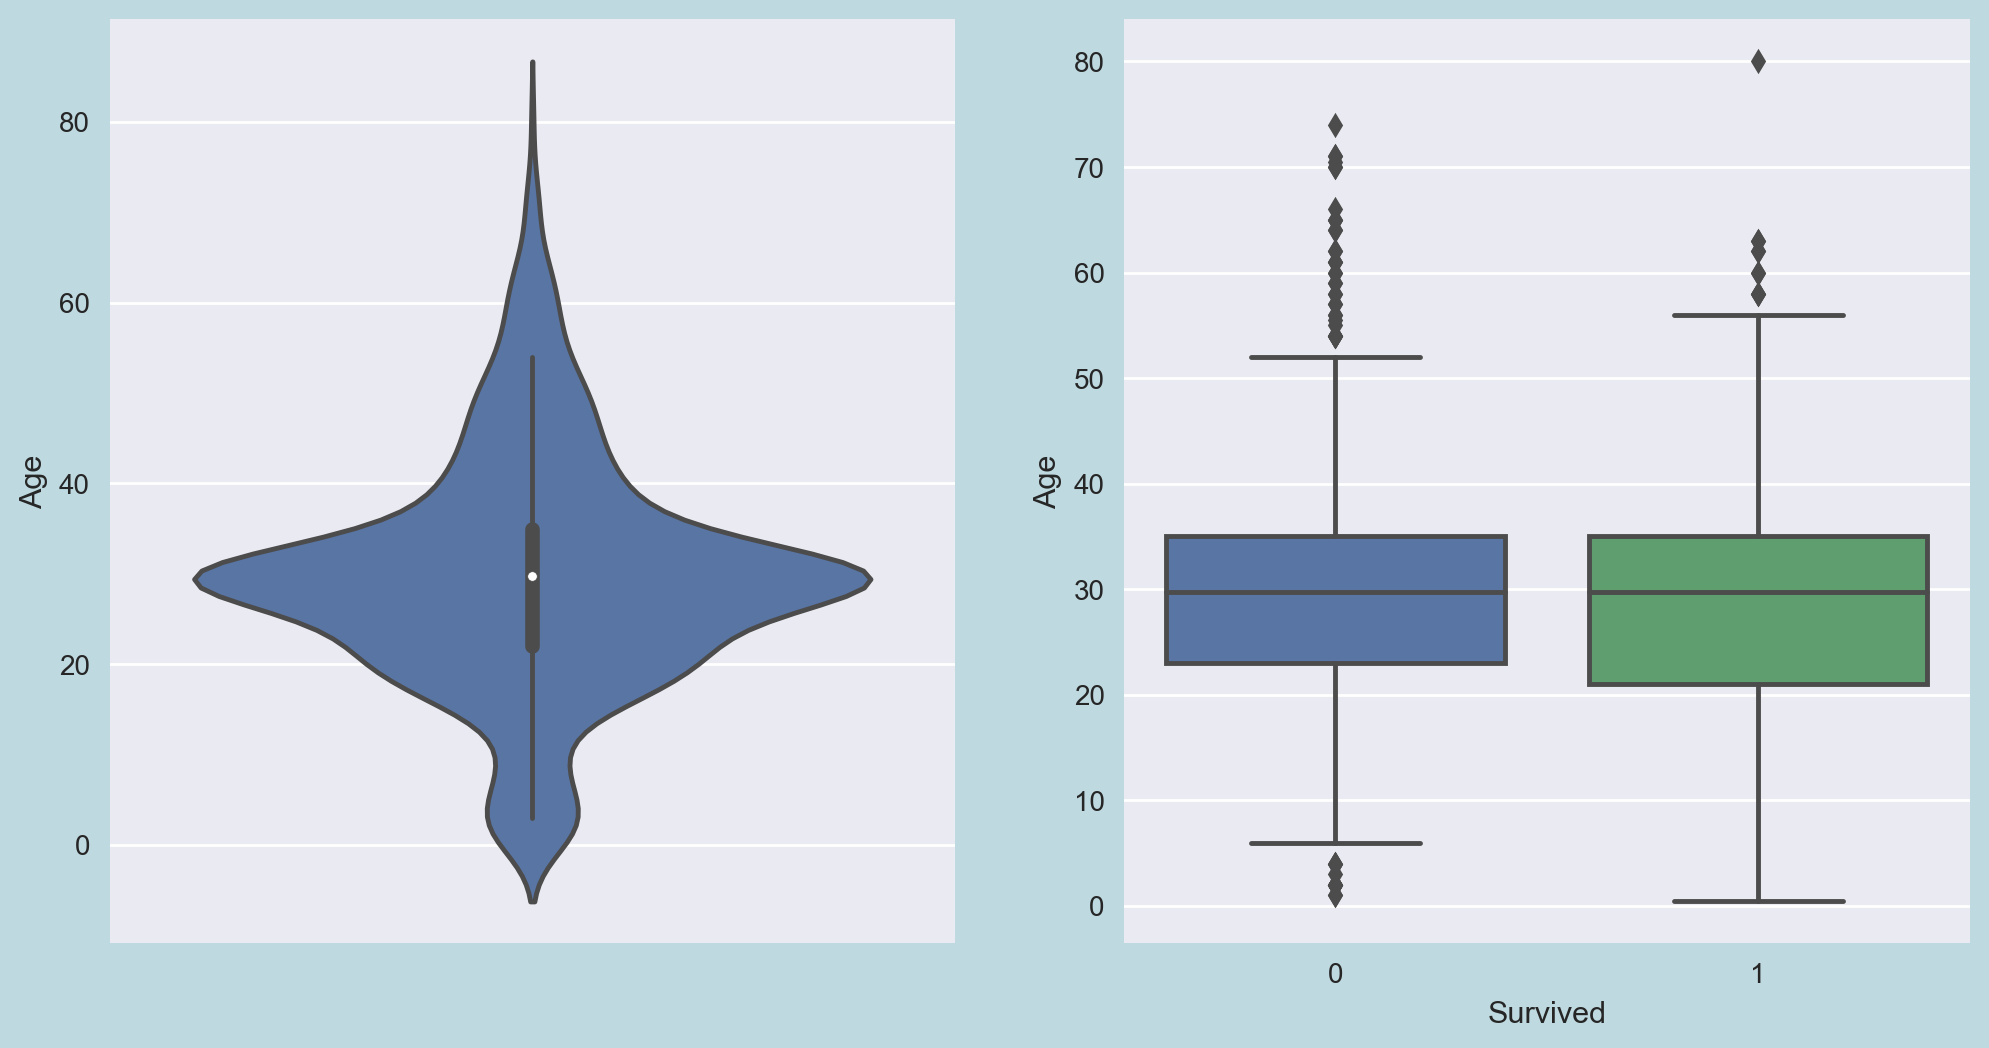

In [38]:
plt.figure(figsize=(12,6), dpi=200, facecolor='#bfd9e0')
plt.subplot(1,2,1)
sns.violinplot(y='Age', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='Survived', y='Age', data=df)

**Observation :**
 - Age distribution are almost normal with little right skewness
 - Highest number of traveller can be seen between in the range between 20 and 40.
 - There is no any valid evidence which show influence of age in survival. 
 - But can observe young people are seen more probability of survival.

-------
-------

Number of people survived   : 342
Number of people Dead       : 549


Percentage of Survivor  : 38.38
Percentage of dead      : 61.62


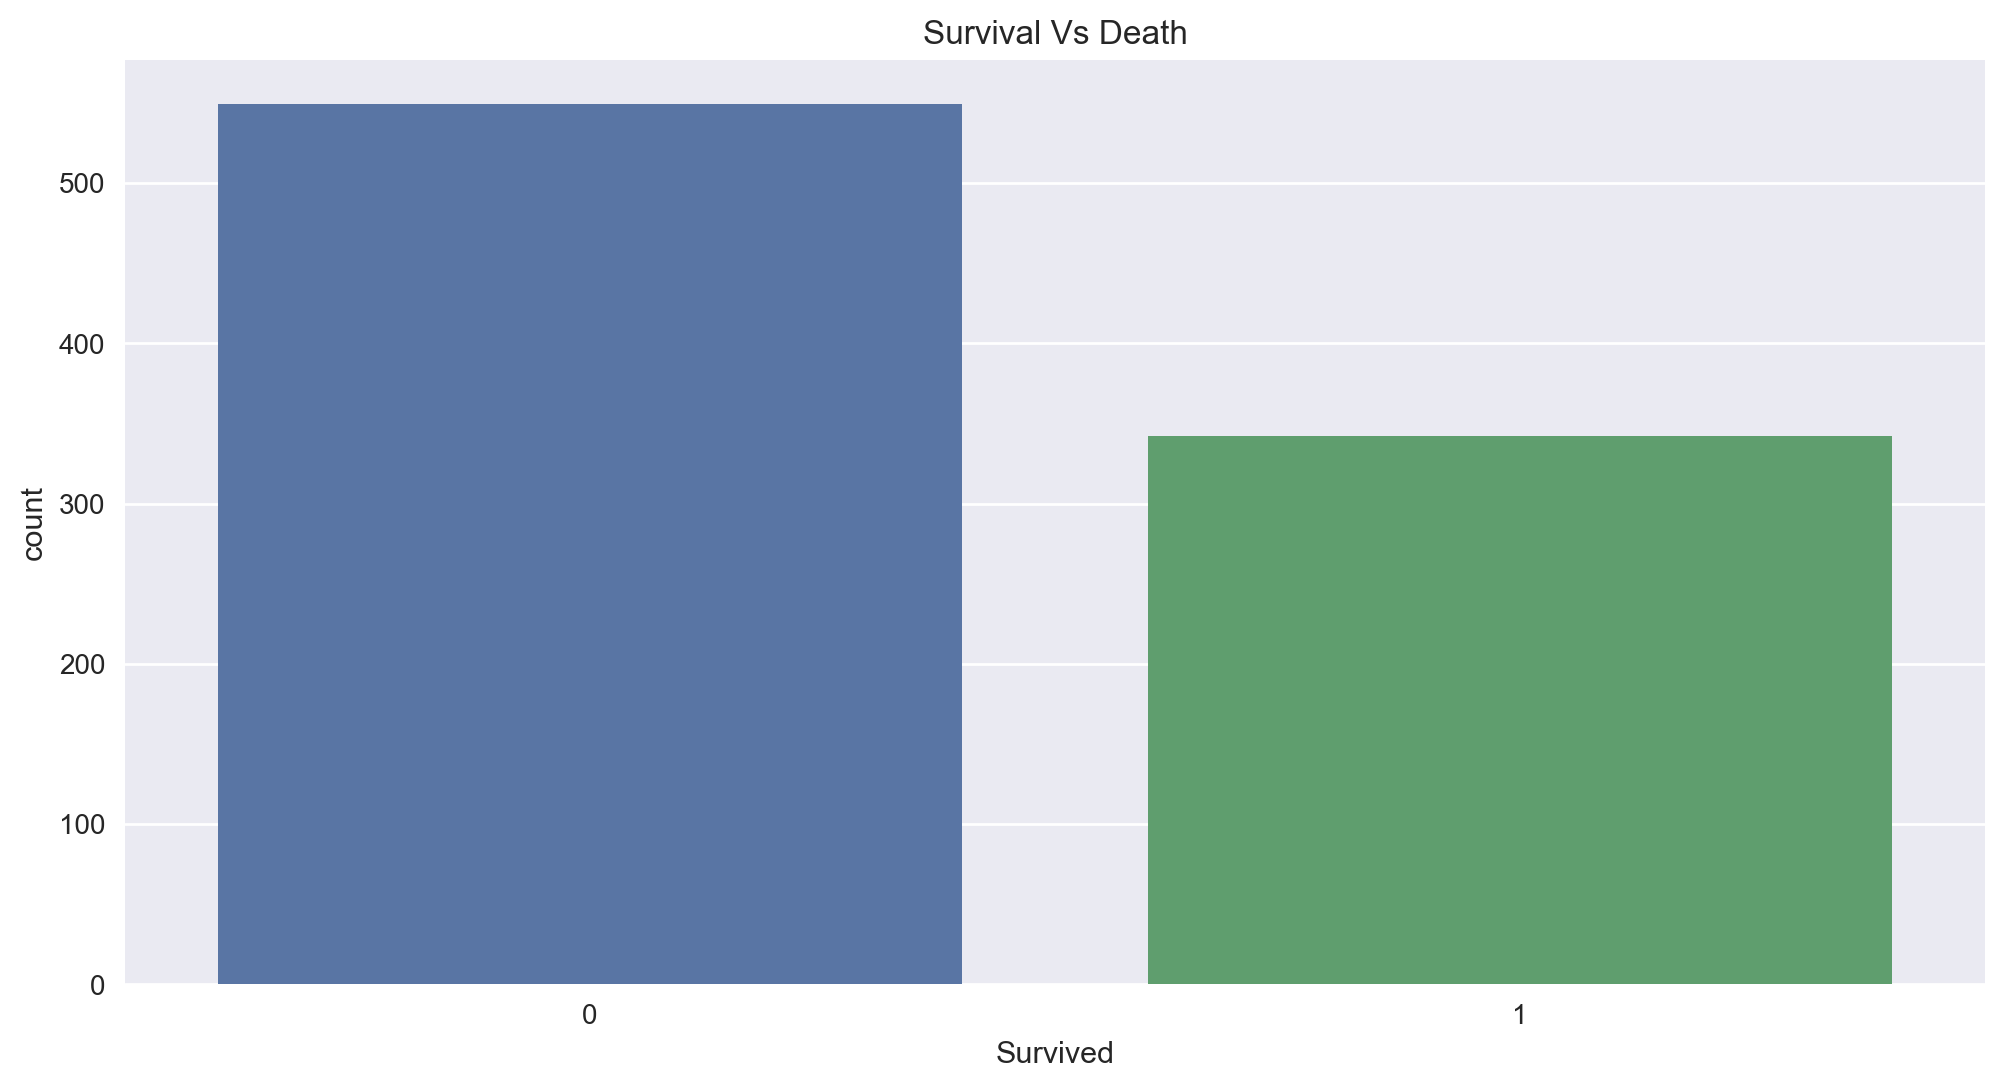

In [39]:
#Checking how many passenger survived and not survived
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(x='Survived', data=df)
plt.title("Survival Vs Death")
print("Number of people survived   :",df.Survived.value_counts()[1])
print("Number of people Dead       :",df.Survived.value_counts()[0])
print('\n')
print('Percentage of Survivor  :',round(df.Survived.value_counts(normalize=True)[1]*100,2))
print('Percentage of dead      :',round(df.Survived.value_counts(normalize=True)[0]*100,2))

**Observation on Survival and Death :**
 - There are total of 891 traveller in the ship.
 - Among them 342 people were survived and 549 are died.
 - From this statics we can give a conclusion that, there is a probability of 38.38% of survival and 61.62% of dead rate.

----
----

In [40]:
# Analysis on Passanger class and Survival
s_rate= df.groupby('Pclass')['Survived'].value_counts(normalize=True)
print("Percentage of 1st class Passenger Survived  :", round(s_rate[1][1],2)*100,"%")
print("Percentage of 1st class Passenger dead      :", round(s_rate[1][0],2)*100,"%\n")
print("Percentage of 2nd class Passenger Survived  :", round(s_rate[2][1],2)*100,"%")
print("Percentage of 2nd class Passenger dead      :", round(s_rate[2][0],2)*100,"%\n")
print("Percentage of 3rd class Passenger Survived  :", round(s_rate[3][1],2)*100,"%")
print("Percentage of 3rd class Passenger dead      :", round(s_rate[3][0],2)*100,"%")
st = pd.DataFrame(df.groupby('Pclass')['Survived'].value_counts())
st.rename(columns={'Pclass': 'Passenger Class', 'Survived': 'Count'})

Percentage of 1st class Passenger Survived  : 63.0 %
Percentage of 1st class Passenger dead      : 37.0 %

Percentage of 2nd class Passenger Survived  : 47.0 %
Percentage of 2nd class Passenger dead      : 53.0 %

Percentage of 3rd class Passenger Survived  : 24.0 %
Percentage of 3rd class Passenger dead      : 76.0 %


Count
Pclass Survived       
1      1           136
       0            80
2      0            97
       1            87
3      0           372
       1           119

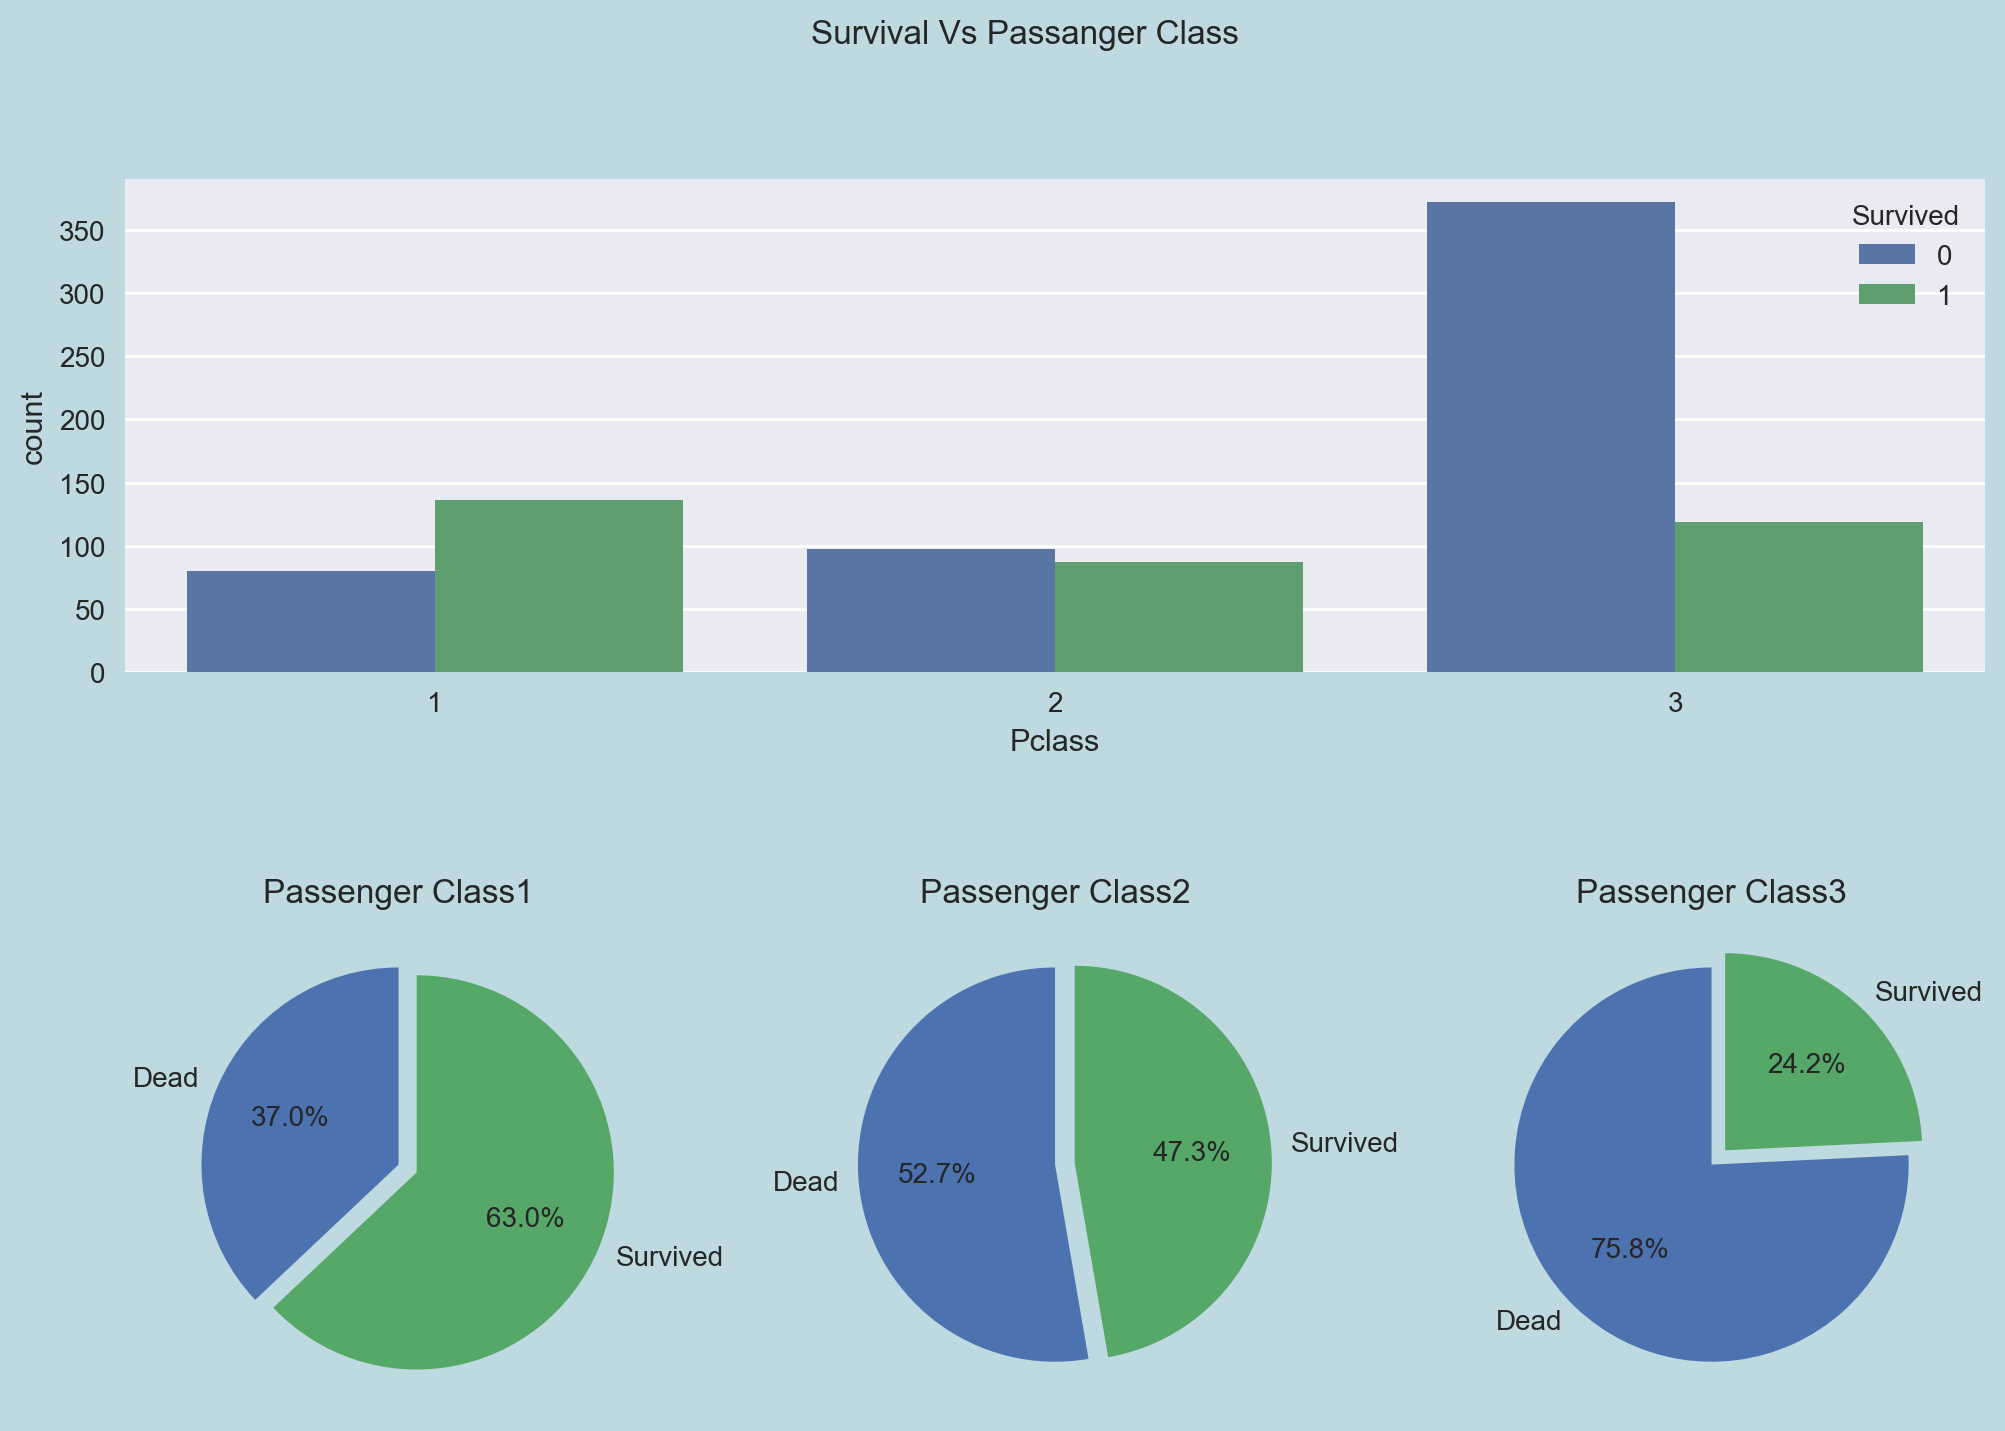

In [41]:
s_rate= df.groupby('Pclass')['Survived'].value_counts(normalize=True)
s_rate = s_rate.sort_index()
labels = ['Dead','Survived']

#Analysing passenger and survival
plt.figure(figsize=(12,8), dpi=200, facecolor='#bfd9e0')
plt.suptitle("Survival Vs Passanger Class")
plt.subplot(2,1,1)
sns.countplot(x='Pclass',data=df, hue='Survived')
plt.subplot(2,3,4)
plt.title('Passenger Class1')
plt.pie(s_rate[1], autopct = '%1.1f%%', explode=[0,0.1], labels=labels, startangle=90)
plt.subplot(2,3,5)
plt.title('Passenger Class2')
plt.pie(s_rate[2], autopct = '%1.1f%%', explode=[0,0.1], labels=labels, startangle=90)
plt.subplot(2,3,6)
plt.title('Passenger Class3')
plt.pie(s_rate[3], autopct = '%1.1f%%', explode=[0,0.1], labels=labels, startangle=90)

plt.subplots_adjust(hspace=0.5)
plt.show()

**Observation on passenger class and Survival :**
- There are three type of passenger class in ship.
- From above analysis, we can find that, passenger class also influence on Survival rate. 
- 1st class have higher rate probability with 63.0%, then on 2nd class with 47.2%.
- 3rd class have least rate of survival with 24.2%.

----
----

Text(0.5, 1.0, 'Gender Vs Survival')

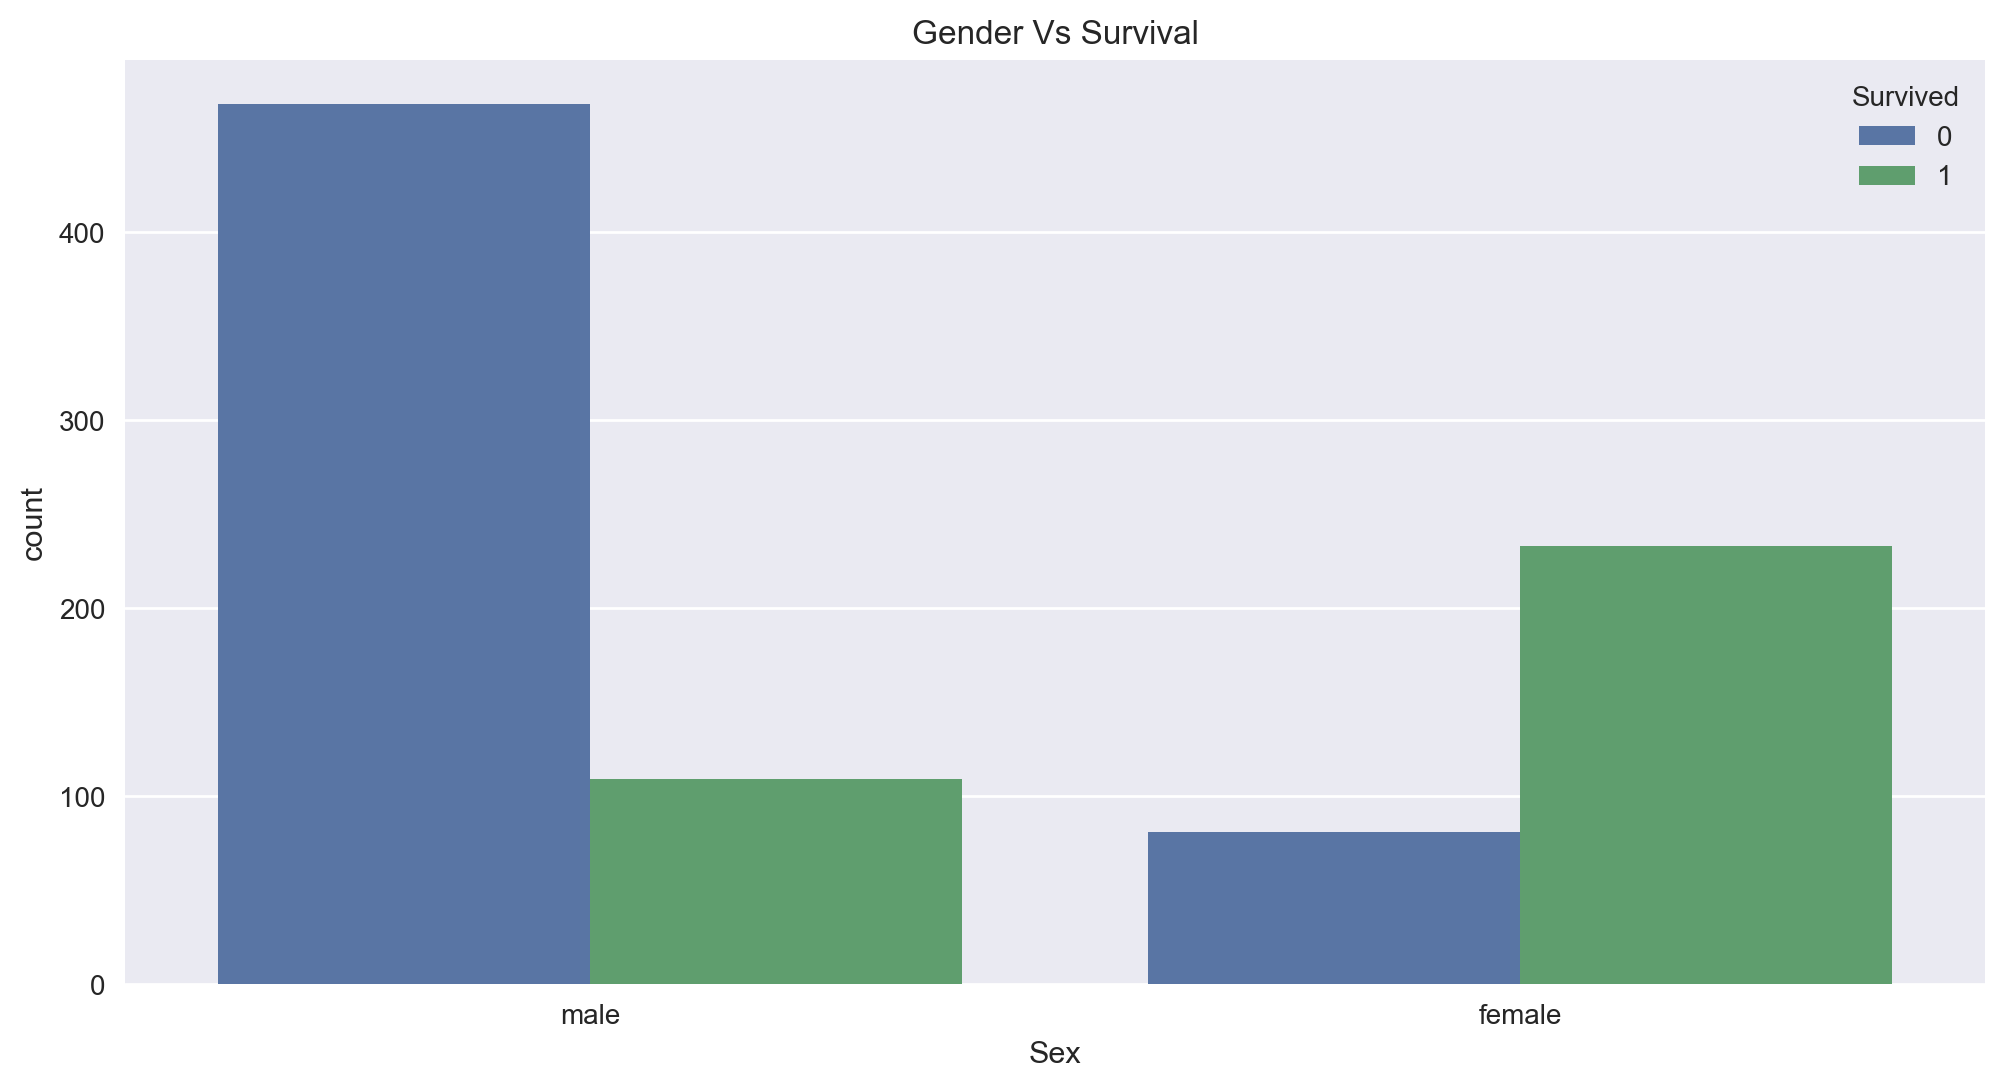

In [42]:
#Gender analysis on survival
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(x='Sex', data=df, hue='Survived')
plt.title('Gender Vs Survival')

In [43]:
ss_rate = df.groupby('Sex')['Survived'].value_counts()
ssp_rate = df.groupby('Sex')['Survived'].value_counts(normalize=True)
print(ss_rate.sort_index())

print("\nPercentage of female survivor   :", ssp_rate['female'][1]*100,'%')
print("Percentage of female dead       :", ssp_rate['female'][1]*100,'%')
print("Percentage of male survivor     :", ssp_rate['male'][1]*100,'%')
print("Percentage of male dead         :", ssp_rate['male'][1]*100,'%')

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Percentage of female survivor   : 74.20382165605095 %
Percentage of female dead       : 74.20382165605095 %
Percentage of male survivor     : 18.890814558058924 %
Percentage of male dead         : 18.890814558058924 %


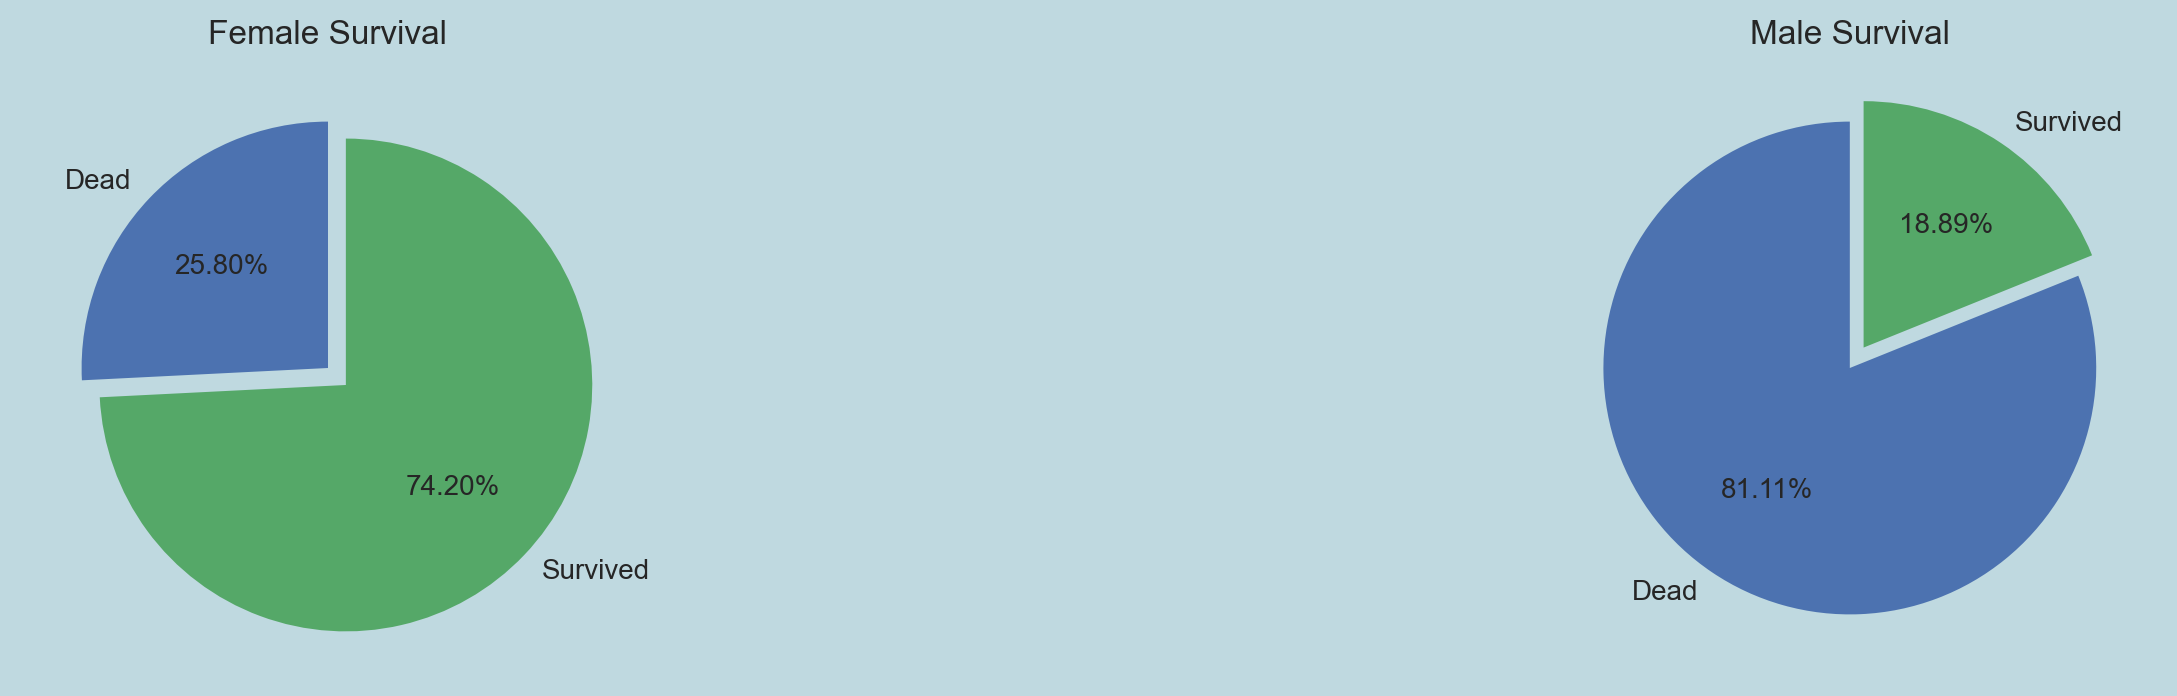

In [44]:
ssp_rate = ssp_rate.sort_index()
plt.figure(figsize=(18,4), dpi=200, facecolor='#bfd9e0')
labels = ['Dead', 'Survived']
plt.subplot(1,2,1)
plt.pie(ssp_rate['female'],startangle=90, labels=labels, autopct='%1.2f%%',explode=[0,0.1])
plt.title('Female Survival')
plt.subplot(1,2,2)
plt.title("Male Survival")
plt.pie(ssp_rate['male'], startangle=90, labels=labels, autopct='%1.2f%%',explode=[0,0.1])

plt.show()

**Observation on Gender and Survival :**

- Gender also influence on survival rate
- Total female passenger is 314 and male is 574.
- Among them 233 female and 109 male survived and 81 female and 468 male are died.
- From this, we can take a conclussion that female have higher rate of survival with 74.20% and male have less survival rate with 18.89%
- Death rate of female is 25.80% and male have 81.11%

----
----

<Axes: xlabel='family_member', ylabel='count'>

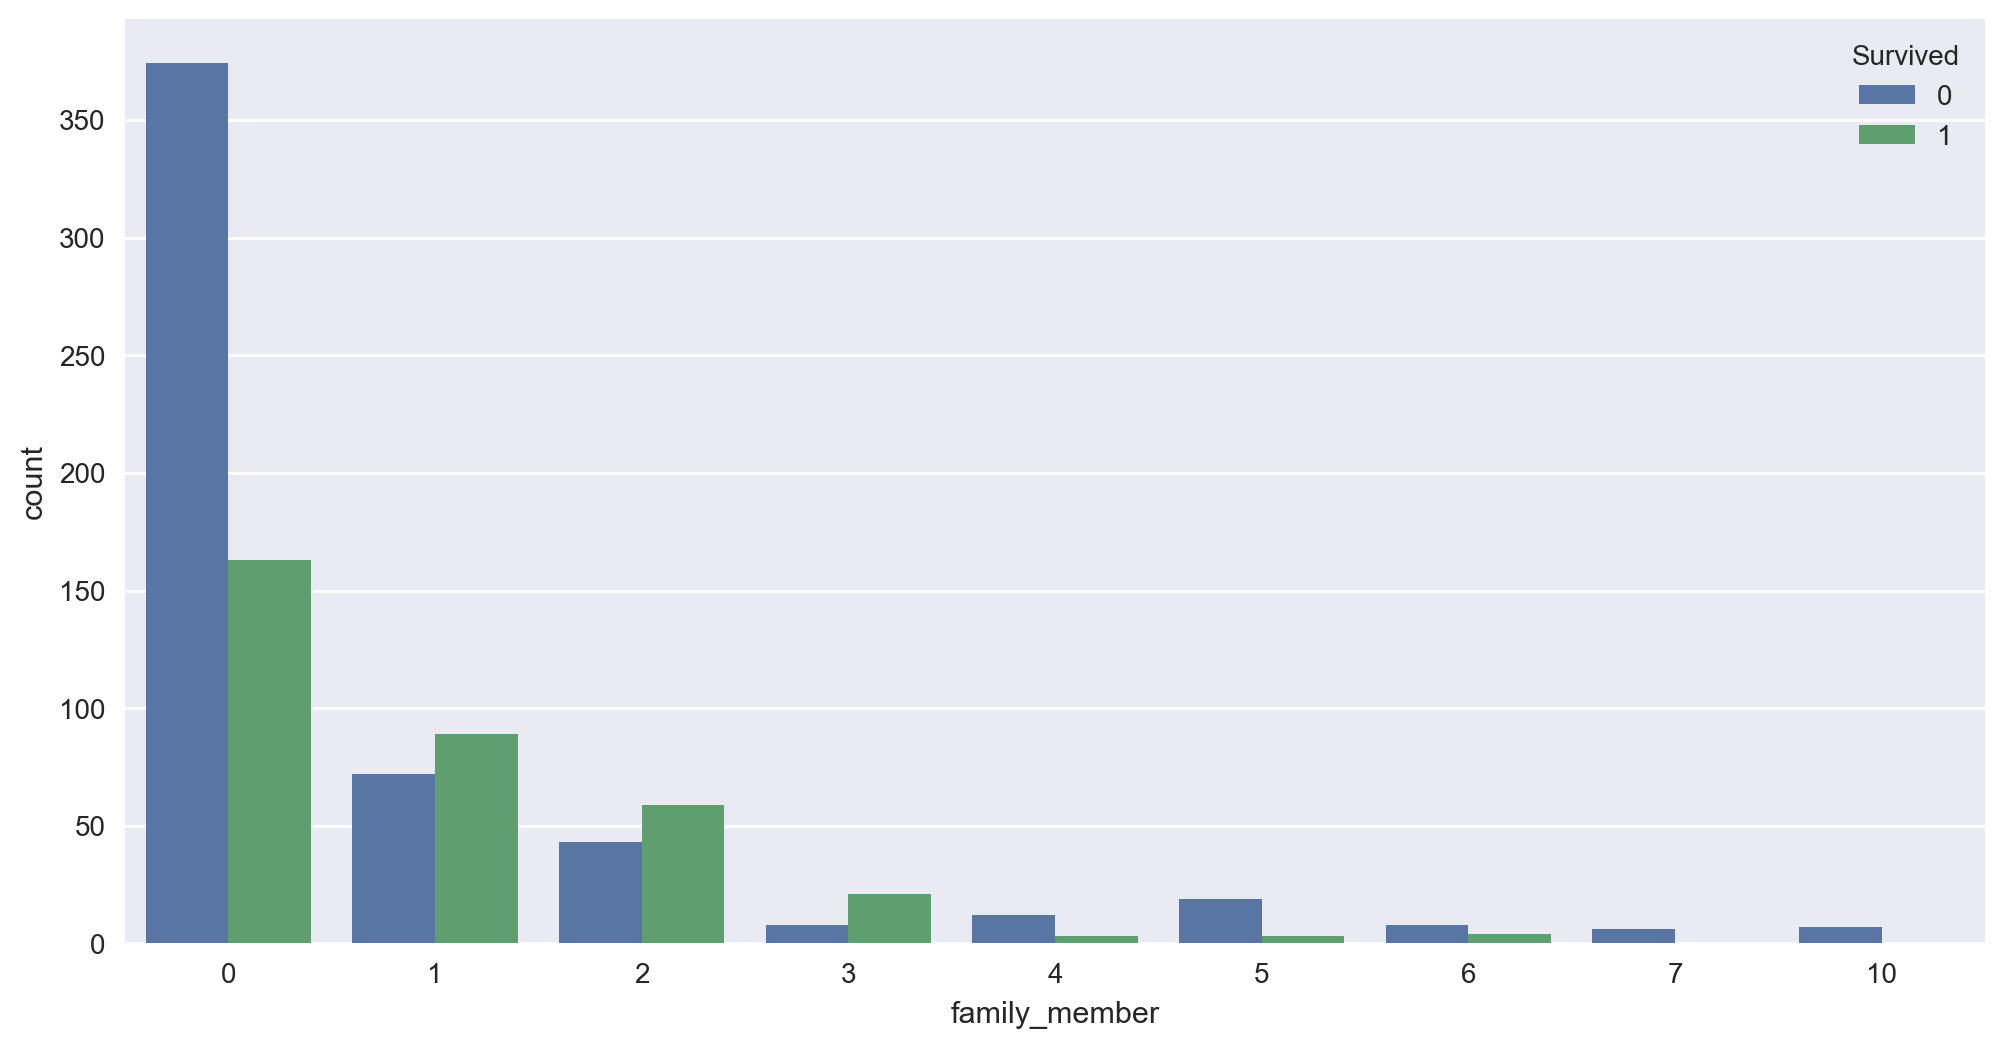

In [45]:
#Analysing family member with survival
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(x='family_member', hue="Survived", data=df)

**Observation on Family member and Survival :**
 - Family member also influence on survival of titanic traveller
 - From above analysis, if solo or member with member with for or more have less probality to survive
 - Higher probability of survive with respect of family member are member between 2 to 4

---
---

Fare of 1st class :  84.0
Fare of 2nd class :  21.0
Fare of 3rd class :  14.0 



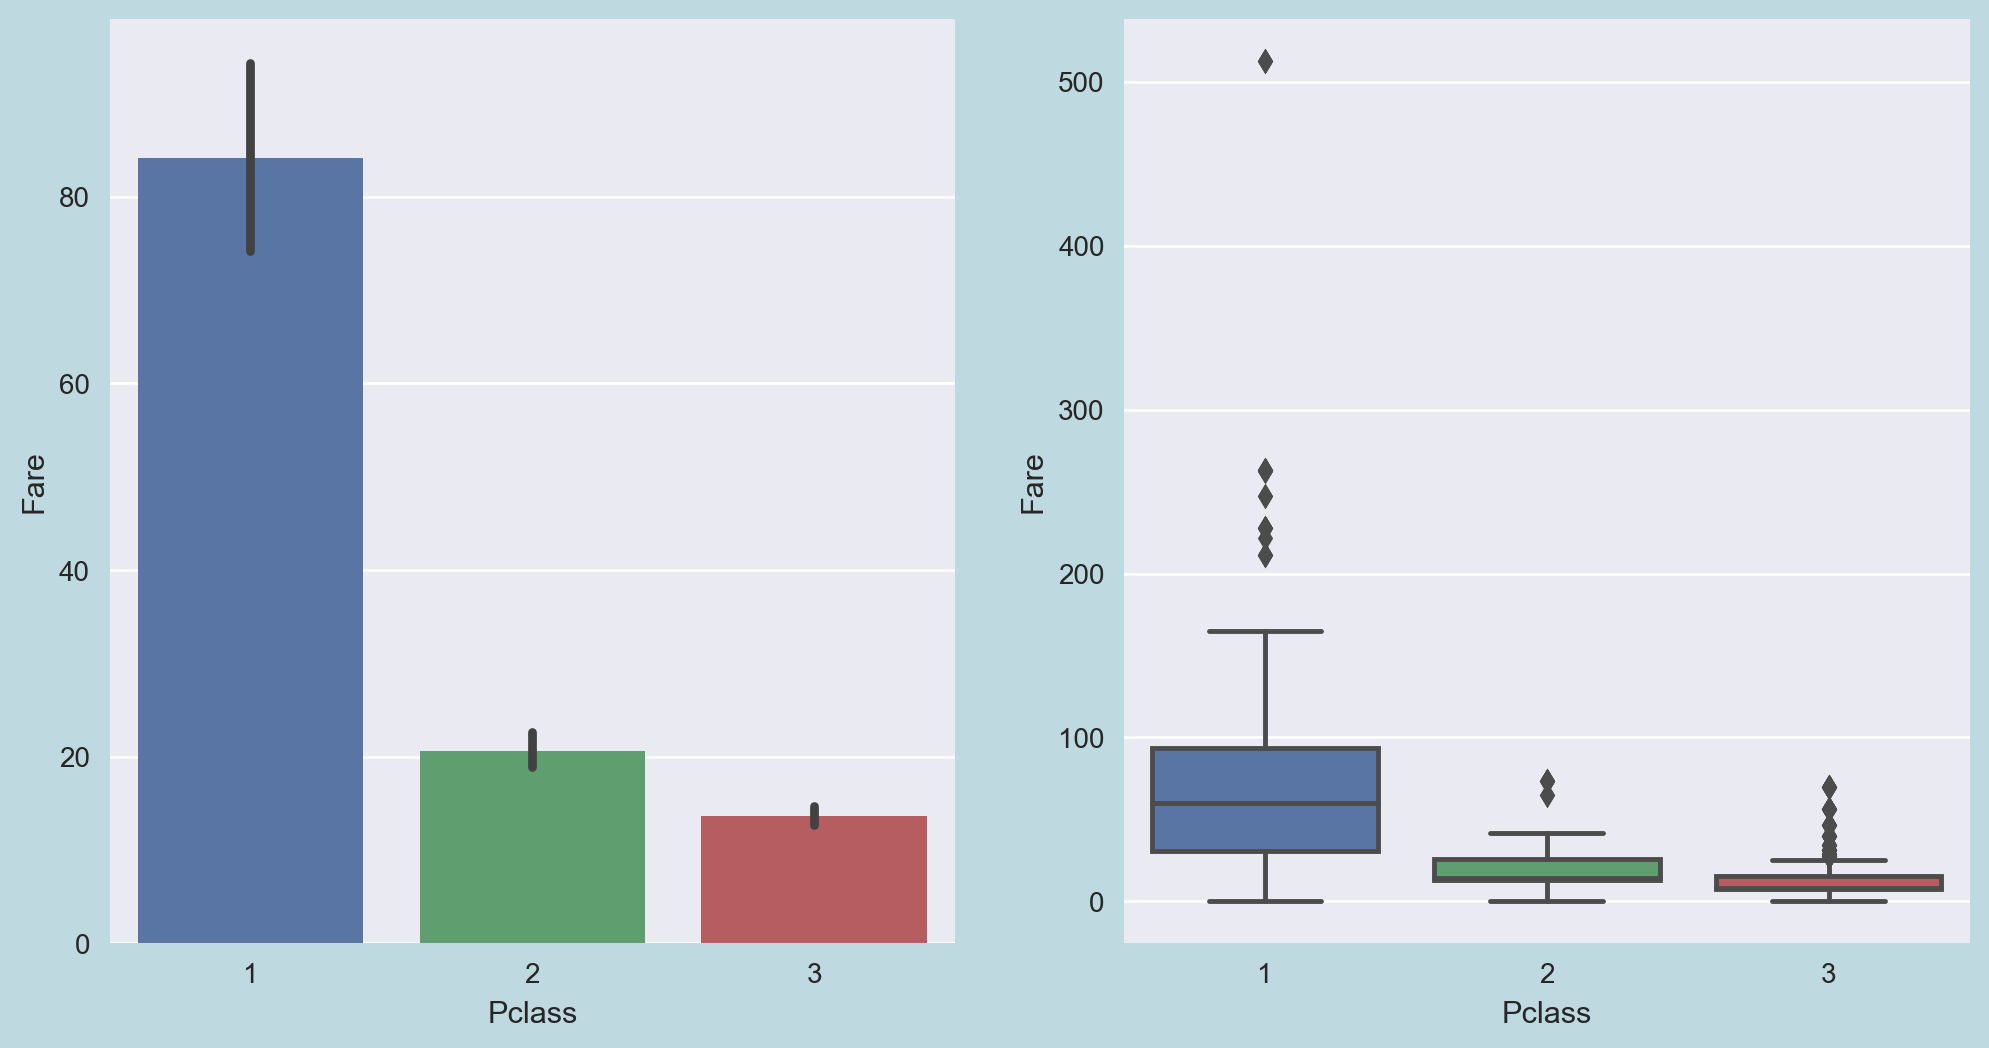

In [46]:
#Analysis Pclass and Fare
plt.figure(figsize=(12,6), dpi=200, facecolor='#bfd9e0')
plt.subplot(1,2,1)
sns.barplot(x='Pclass', y='Fare', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='Pclass',y='Fare',data=df)


print("Fare of 1st class : ", round(df.groupby('Pclass')['Fare'].mean())[1])
print("Fare of 2nd class : ", round(df.groupby('Pclass')['Fare'].mean())[2])
print("Fare of 3rd class : ", round(df.groupby('Pclass')['Fare'].mean())[3],'\n')

<Axes: xlabel='Survived', ylabel='Fare'>

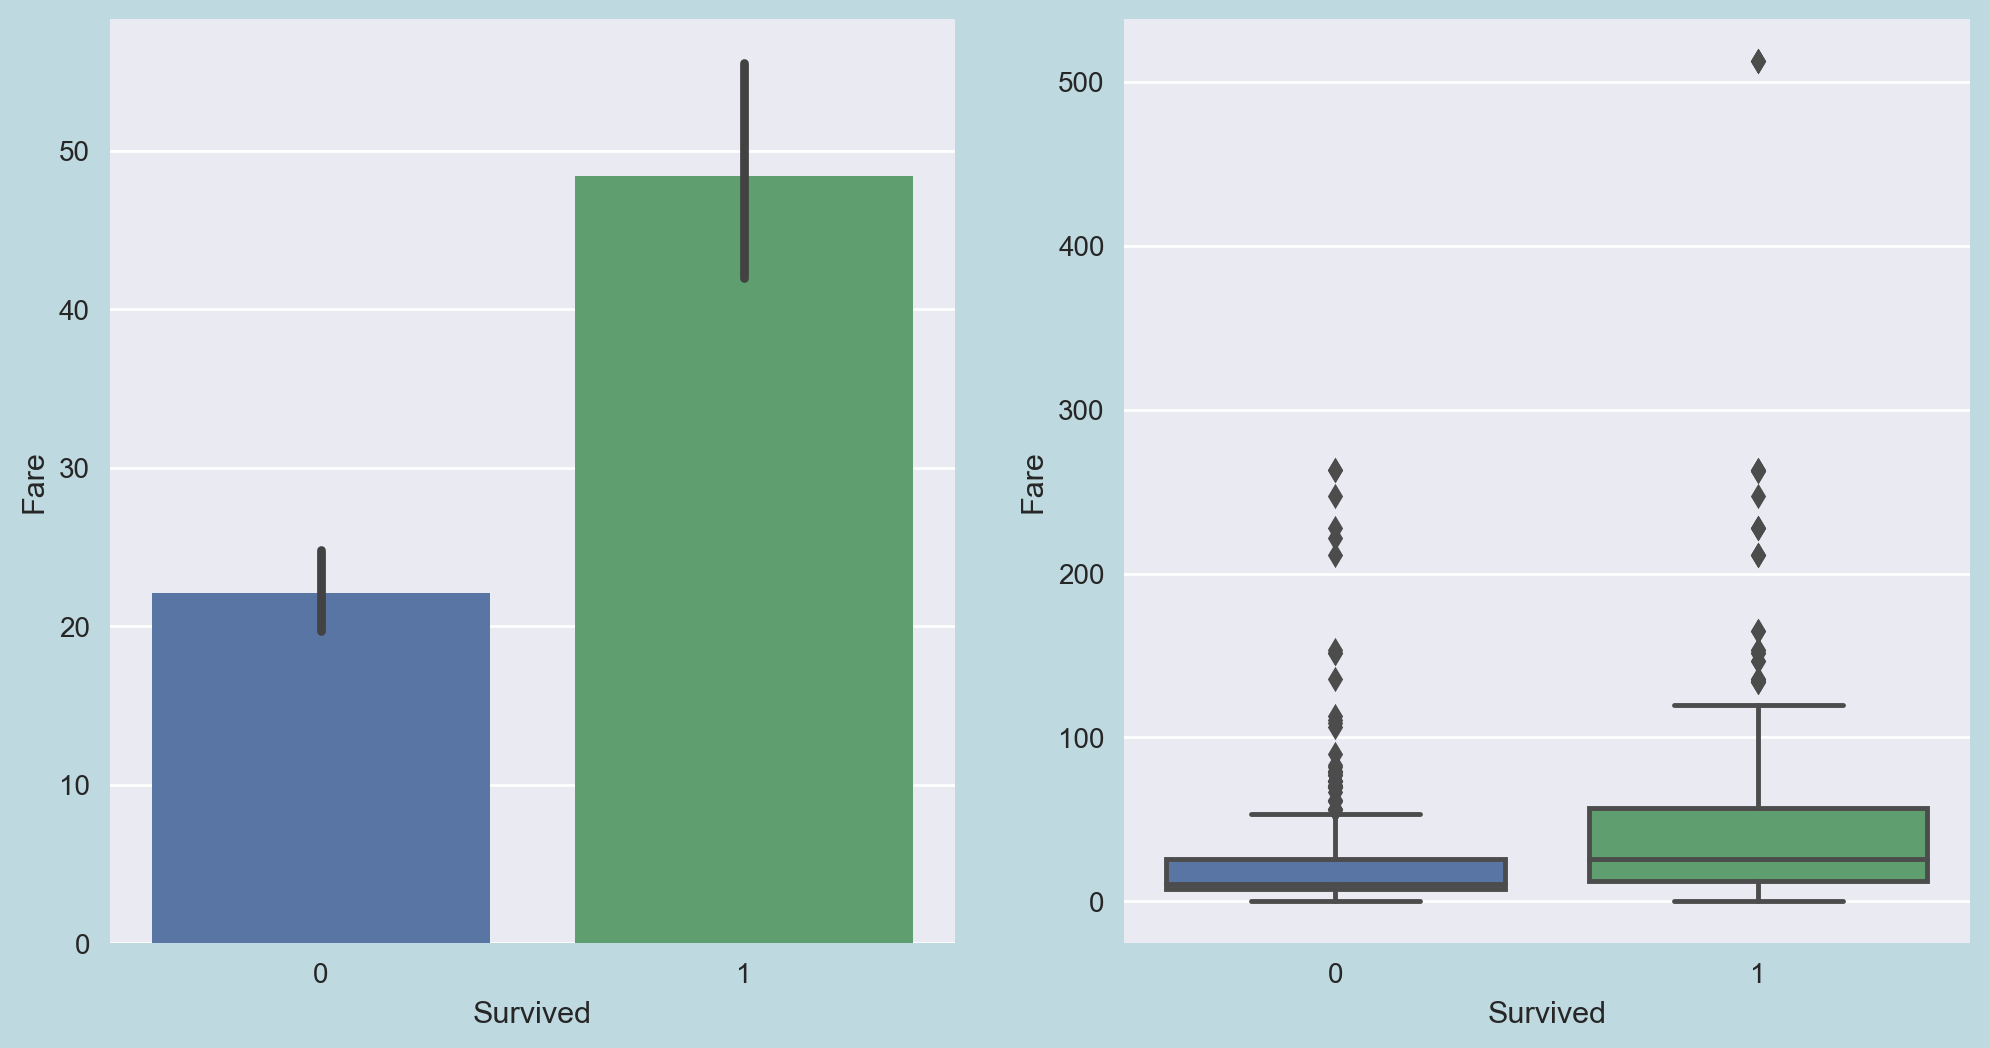

In [47]:
#Analysis Pclass and Fare
plt.figure(figsize=(12,6), dpi=200, facecolor='#bfd9e0')
plt.subplot(1,2,1)
sns.barplot(x='Survived', y='Fare', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='Survived',y='Fare',data=df)

In [48]:
df[df.Fare>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_member
258,259,1,1,"Ward, Miss. Anna",female,35.0,PC 17755,512.3292,C,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,PC 17755,512.3292,C,1
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,PC 17755,512.3292,C,0


**Observation on Fare and Survival**
 - Fare also influence on survival of the passenger.
 - If they pay higher amount of fare, there is higher posibility of survival.
 - We can find some outlier in fare of more than 500. 
 - It is assumed that, this passenger travel longest route with 1st class.

---
---

<Axes: xlabel='Embarked', ylabel='count'>

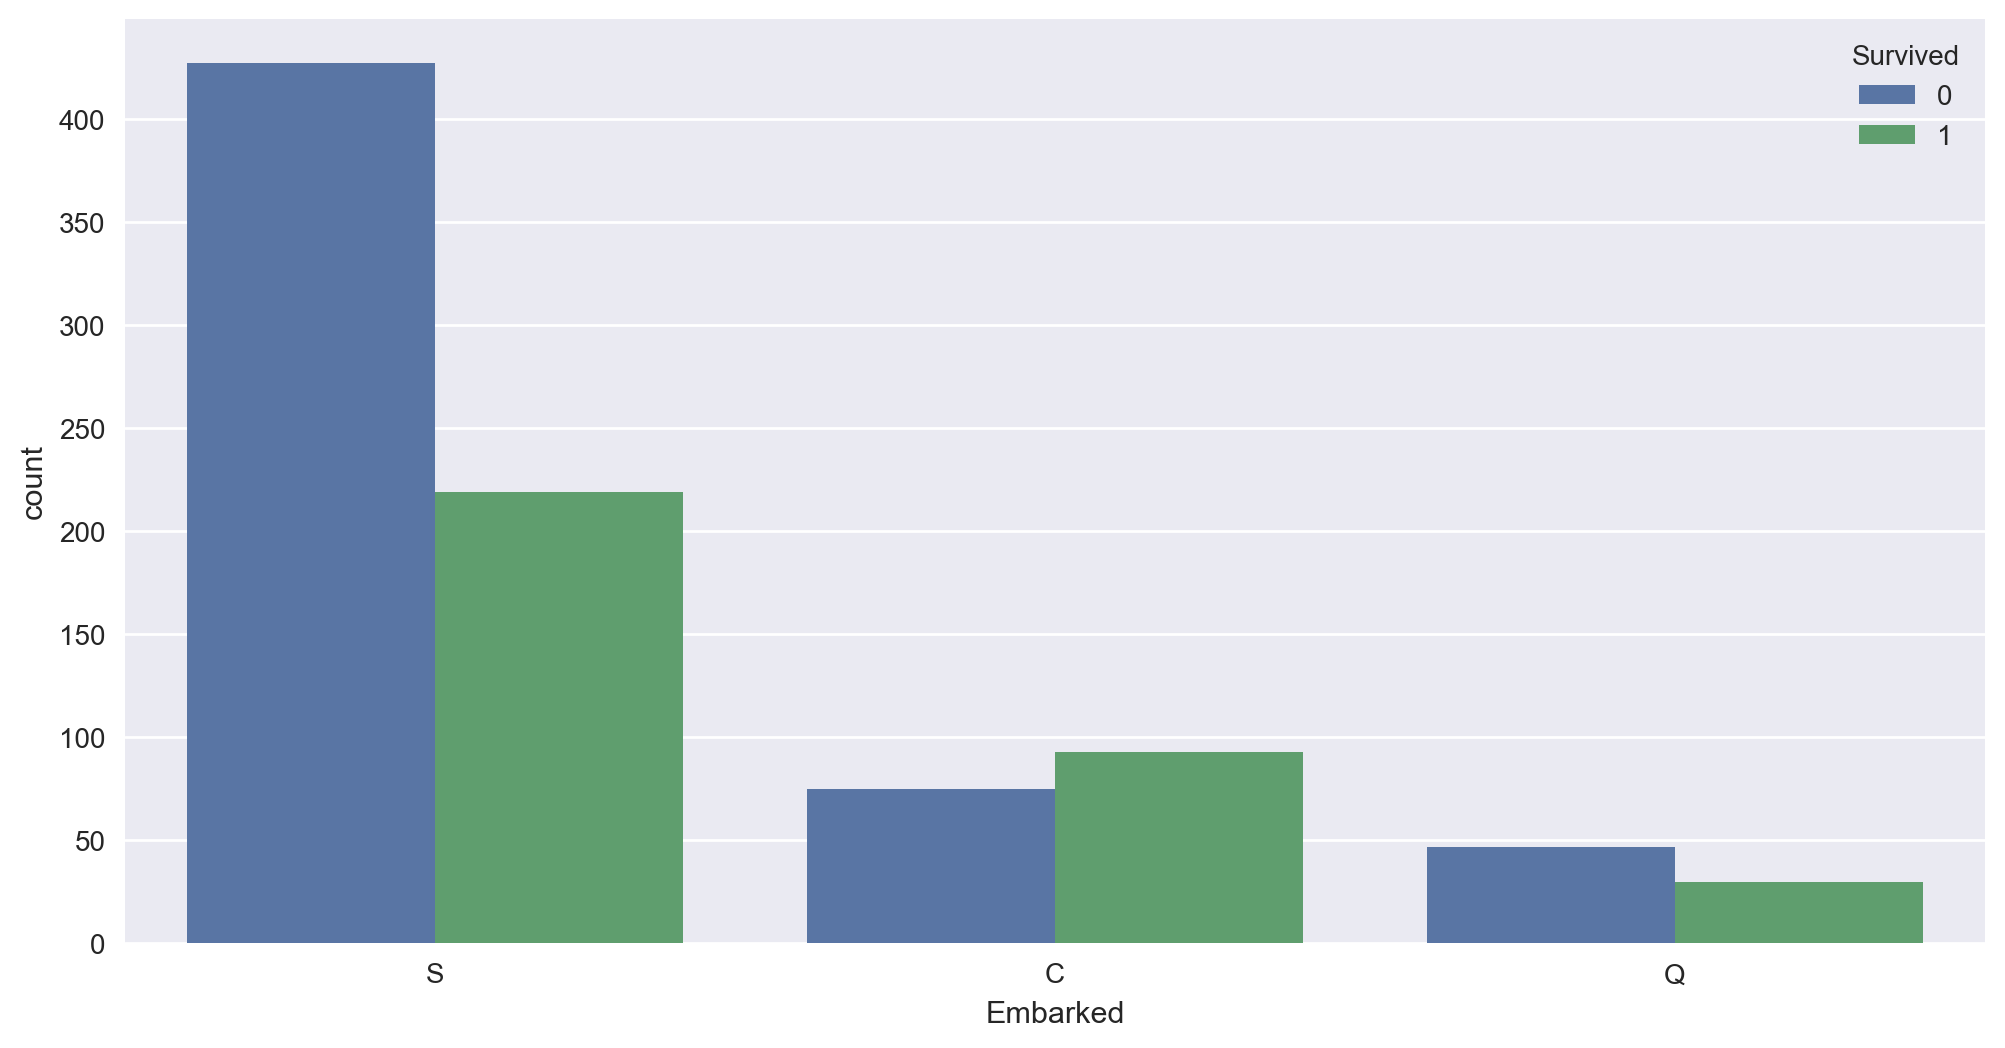

In [49]:
#Analysis on Embarkment and survival
plt.figure(figsize=(12,6), dpi=200)
sns.countplot(x='Embarked',data=df, hue='Survived')

Percentage of S embarked survival :  33.9 %
Percentage of S embarked Dead     :  66.1 %

Percentage of C embarked survival :  55.36 %
Percentage of C embarked Dead     :  44.64 %

Percentage of Q embarked survival :  38.96 %
Percentage of Q embarked Dead     :  61.04 %



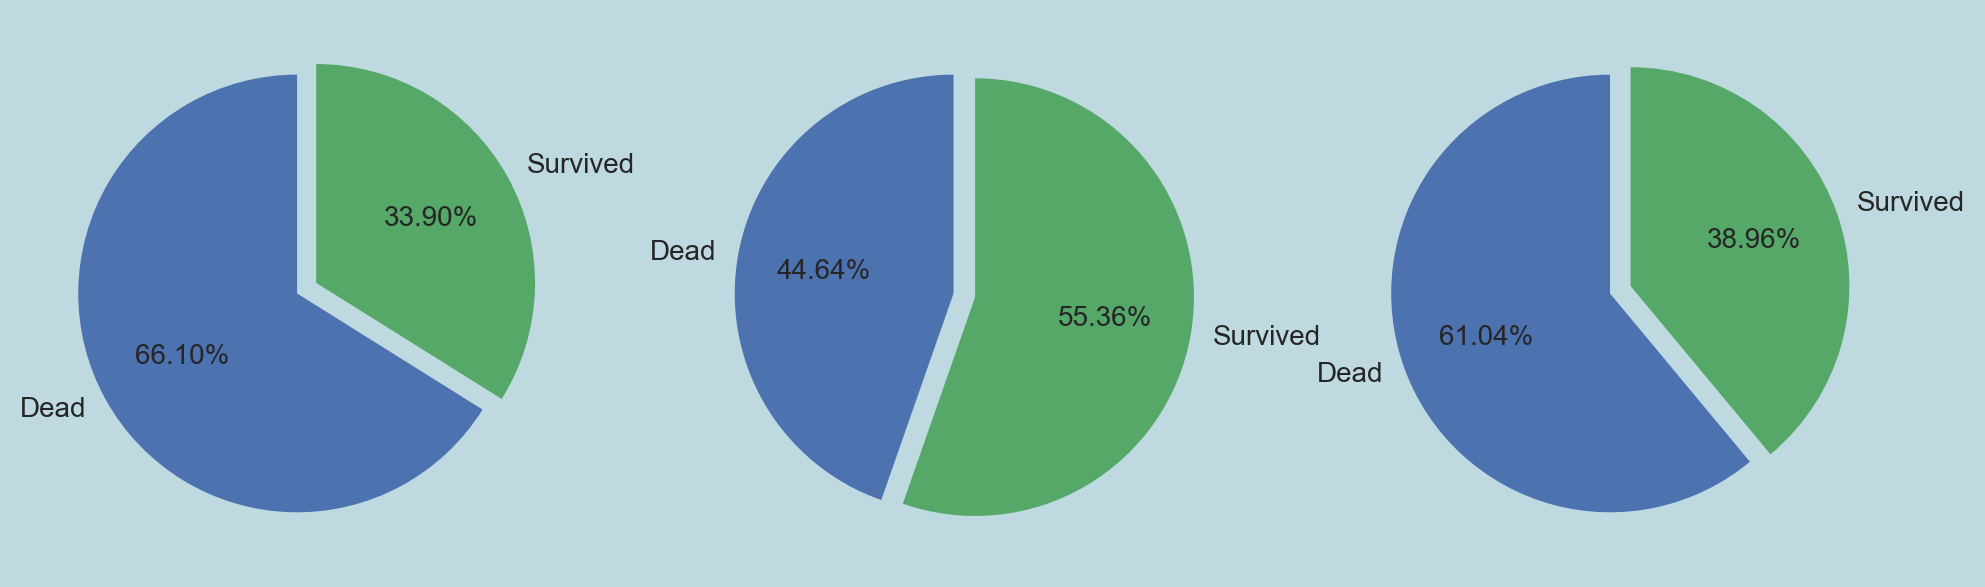

In [50]:
e_rate = df.groupby('Embarked').Survived.value_counts(normalize=True)
e_rate.sort_index(inplace=True)

print('Percentage of S embarked survival : ', round(e_rate['S'][1]*100,2),'%')
print('Percentage of S embarked Dead     : ', round(e_rate['S'][0]*100,2),'%\n')
print('Percentage of C embarked survival : ', round(e_rate['C'][1]*100,2),'%')
print('Percentage of C embarked Dead     : ', round(e_rate['C'][0]*100,2),'%\n')
print('Percentage of Q embarked survival : ', round(e_rate['Q'][1]*100,2),'%')
print('Percentage of Q embarked Dead     : ', round(e_rate['Q'][0]*100,2),'%\n')

labels = ['Dead','Survived']
plt.figure(figsize=(12,4), dpi=200, facecolor='#bfd9e0')
plt.subplot(1,3,1)
plt.pie(e_rate['S'],labels=labels, autopct='%1.2f%%', explode=[0,0.1], startangle=90)
plt.subplot(1,3,2)
plt.pie(e_rate['C'],labels=labels, autopct='%1.2f%%', explode=[0,0.1], startangle=90)
plt.subplot(1,3,3)
plt.pie(e_rate['Q'],labels=labels, autopct='%1.2f%%', explode=[0,0.1], startangle=90)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

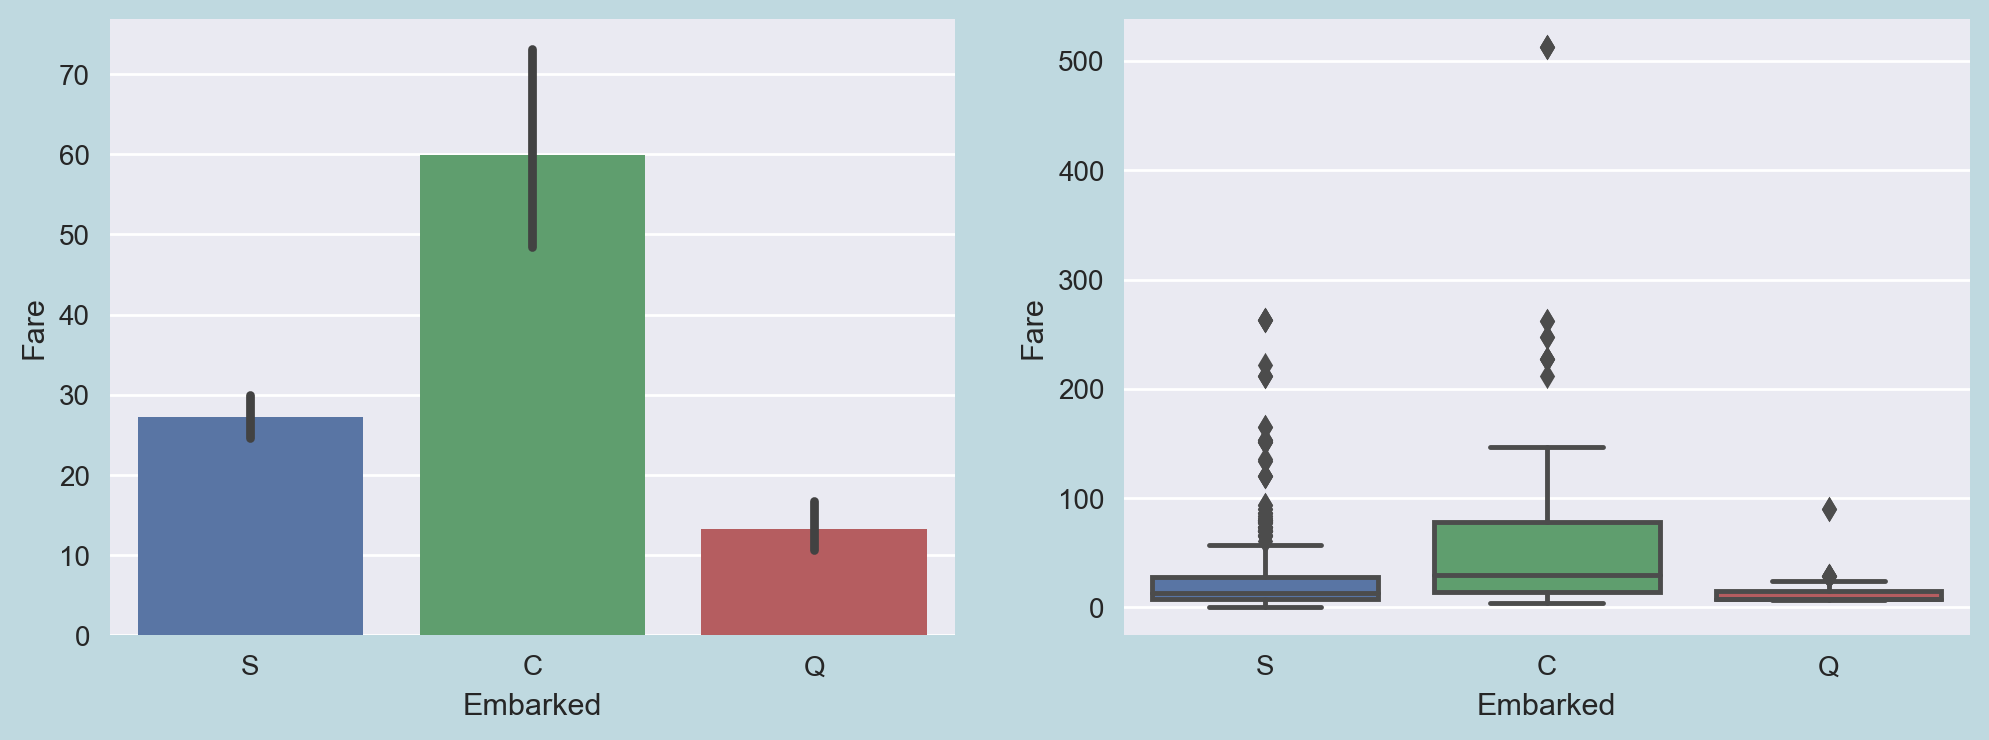

In [51]:
#Comparison between fare and Embarkment
plt.figure(figsize=(12,4), dpi=200, facecolor='#bfd9e0')
plt.subplot(1,2,1)
sns.barplot(x='Embarked',y='Fare', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='Embarked',y='Fare', data=df)

plt.show

**Observation on Embarked and Survival**

 - Embarked also have influence on survival rate of passenger.
 - Passenger embarkedfrom C has high chance for survival with 55.36%.
 - Passenger embarked from S and Q, both have low chance of survival with 33.9% and 38% repectively.
 - When i compare embarkment with fare, i notice that, passenger embarked from C pay more charges even 500.
 - It is assumed that, passenger embarked from C have some special previlage.

In [52]:
df.dtypes


PassengerId        int64
Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
Ticket            object
Fare             float64
Embarked          object
family_member      int64
dtype: object

<Axes: >

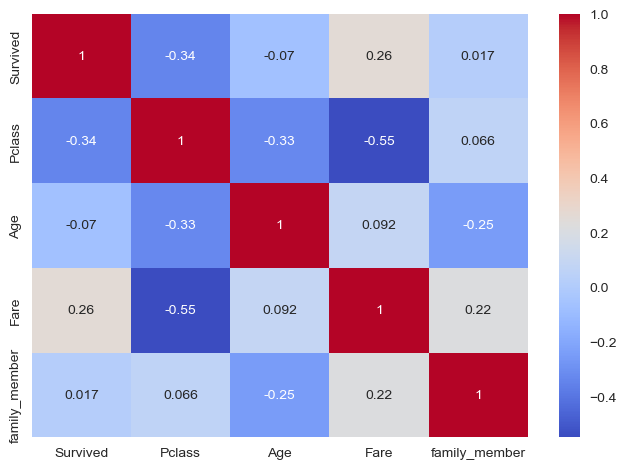

In [53]:
df_h = df[['Survived', 'Pclass','Age','Fare','family_member']]
s=df_h.corr()
sns.heatmap(s, annot=True, cmap='coolwarm')

**Observation on Heatmap**
 - Given all independent variable have relation with survival rate.

---
---

# Inferences and Conclusions

- **Age Distribution:**
  - Approximately normal distribution with a slight right skewness.
  - Highest number of travelers between the ages of 20 and 40.
  - No clear evidence of age directly influencing survival.
  - Younger people show a higher probability of survival.

- **Total Passengers:**
  - Total of 891 passengers: 342 survived, 549 died.
  - Survival rate: 38.38%, Death rate: 61.62%.

- **Passenger Class:**
  - Survival rate influenced by passenger class.
  - 1st class: 63.0% survival rate.
  - 2nd class: 47.2% survival rate.
  - 3rd class: 24.2% survival rate.

- **Gender:**
  - Gender influences survival rate.
  - Female passengers: 74.20% survival rate.
  - Male passengers: 18.89% survival rate.
  - Death rate: Female - 25.80%, Male - 81.11%.

- **Family Members:**
  - Family member count influences survival.
  - Higher probability with 2 to 4 family members.
  - Solo or families with more than 4 members have lower survival probability.

- **Fare:**
  - Fare influences survival.
  - Higher fare associated with higher survival probability.
  - Some outliers in fare, particularly above 500.

- **Embarked:**
  - Embarkment location influences survival.
  - C: 55.36% survival rate.
  - S: 33.9% survival rate.
  - Q: 38% survival rate.
  - Passengers from C tend to pay higher fares.

- **Conclusion:**
  - All independent variables have a relationship with the survival rate.


---
---